In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('SONY.csv', header=0, parse_dates=[0], index_col=0)
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# In ra 5 dòng đầu tiên của DataFrame
df


,Price,Open,High,Low,Vol.,Change %
0,45.79,45.44,45.81,45.24,844.22K,1.87%
1,46.30,45.93,46.36,45.90,613.23K,1.11%
2,47.25,46.81,47.26,46.80,770.67K,2.05%
3,48.70,48.18,48.79,48.17,1.36M,3.07%
4,49.00,48.80,49.01,48.73,618.86K,0.62%
...,...,...,...,...,...,...
1490,85.32,85.27,85.53,84.62,1.03M,-0.95%
1491,86.40,85.88,86.69,85.86,811.89K,1.27%
1492,88.40,89.00,89.54,88.40,2.17M,2.31%
1493,88.51,87.98,88.62,87.37,850.75K,0.12%


In [2]:
# 2.  chia train test validate theo tỉ lệ 7:3
# Split the data into training, testing
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))


X2D = df[['High']] # Biến độc lập theo mảng 2 chiều
Y2D = df[['Price']] # Biến phụ thuộc theo mảng 2 chiều



In [3]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index # lấy ra index trước khi đổi nó về mảng 2 chiều ( phục vụ plot )
y_train = Y2D[:train_size].values.ravel()

# Tạo mô hình SVR với kernel RBF
model = SVR(kernel='rbf')
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],             # Ví dụ các giá trị cho C
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Ví dụ các giá trị cho gamma
    'epsilon': [0.001, 0.01, 0.1, 1, 10]      # Ví dụ các giá trị cho epsilon
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình sử dụng grid search
svr_rbf = grid_search.fit(x_train,y_train)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'C': 1000, 'epsilon': 1, 'gamma': 0.001}
Best score: 0.9052924064901315


In [4]:


y_pred = svr_rbf.predict(x_test)
y_pred


array([102.03016525, 101.30170071, 101.10197532, 100.9421485 ,
        97.92768155,  96.90316085,  98.10834005,  97.99794295,
        99.69205312,  99.31151591,  96.59154932,  97.24480817,
       102.00024436, 103.67395672, 105.1063469 , 104.88758786,
       105.2554919 , 104.5892461 , 106.42873763, 105.71284587,
       104.02224447, 105.73273056, 105.23560624, 103.52465485,
       102.2196336 , 103.97249576, 102.42898573,  98.75030556,
        97.72689826,  98.56981382,  93.26052012,  91.89179274,
        90.84593707,  90.80573159,  88.19656763,  88.23663748,
        89.12880472,  89.96181991,  86.60581078,  86.5258786 ,
        85.37797333,  85.09879506,  86.78569552,  87.37567966,
        85.36800062,  85.60738844,  87.58580715,  86.30611769,
        83.84392217,  81.49895591,  82.69052946,  81.55850168,
        83.86382333,  86.14633993,  86.03651627,  86.81568134,
        88.10641936,  88.60739765,  89.37961666,  89.13883554,
        88.25667332,  87.82603757,  89.78108989,  91.24

In [5]:
last_row = df.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[89.3]])

In [6]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)
x_next_30_days

[array([88.17653361]),
 array([87.05215339]),
 array([85.9288611]),
 array([84.80863622]),
 array([83.69332374]),
 array([82.58454179]),
 array([81.48361522]),
 array([80.39153827]),
 array([79.30896465]),
 array([78.23622132]),
 array([77.17333977]),
 array([76.12009846]),
 array([75.07607033]),
 array([74.04067017]),
 array([73.01319799]),
 array([71.99287576]),
 array([70.97887602]),
 array([69.97034186]),
 array([68.96639852]),
 array([67.96615751]),
 array([66.96871487]),
 array([65.97314536]),
 array([64.97849514]),
 array([63.98377566]),
 array([62.98796217]),
 array([61.99000049]),
 array([60.98882648]),
 array([59.98340321]),
 array([58.97278159]),
 array([57.95619124])]

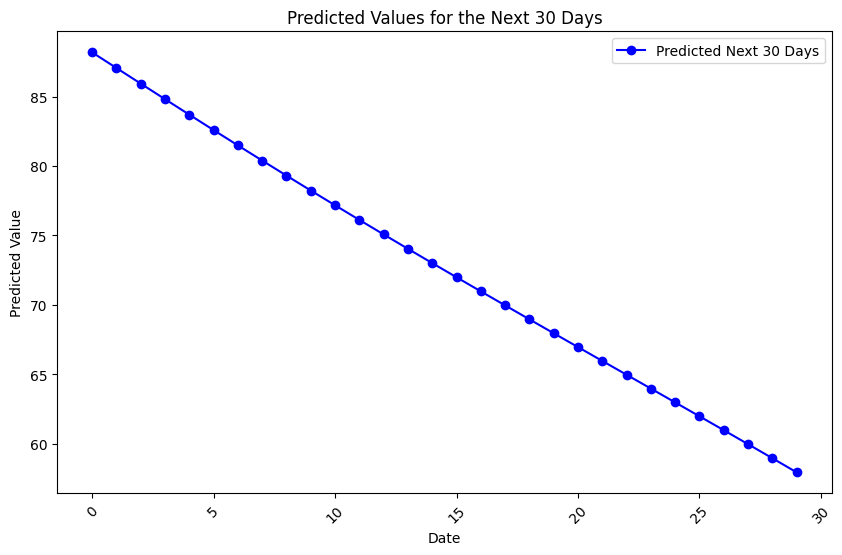

In [7]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [8]:
# Chuyển cột predict price thành mảng 2 chiều
y_pred = y_pred.reshape(-1,1)

In [9]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: 0.7773750165013922
Testing MAPE: 0.0075856711981606186
Testing MAE: 0.649575821116974


In [10]:
# Tạo index cho 30 ngày tiếp theo
last_index =  df.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

Testing RMSE: 0.7773750165013922
Testing MAPE: 0.0075856711981606186
Testing MAE: 0.649575821116974


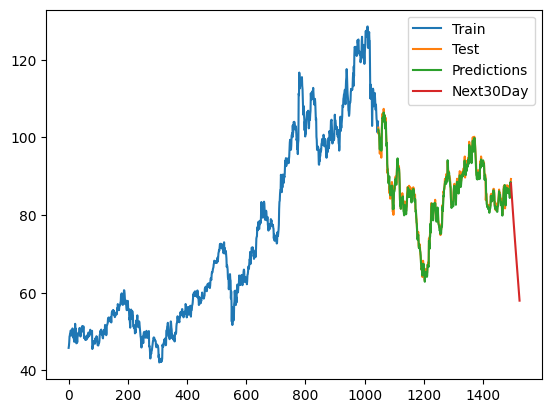

In [11]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

# 9.Vẽ hình

plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates,x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()